Importing the Dependencies

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [82]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('used_car_dataset.csv')

In [83]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,car_name,car_price_in_Lakh,s_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,4.45,22402.0,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,2.93,10344.0,Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,22.49,12999.0,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,6.95,45000.0,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],12.00,11193.0,Petrol,Kolkata,2019


In [84]:
# checking the number of rows and columns
car_dataset.shape

(2105, 6)

In [85]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2105 non-null   object 
 1   car_price_in_Lakh    2105 non-null   float64
 2   s_driven             2105 non-null   float64
 3   fuel_type            2105 non-null   object 
 4   city                 2105 non-null   object 
 5   year_of_manufacture  2105 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 98.8+ KB


In [86]:
# checking the number of missing values
car_dataset.isnull().sum()

car_name               0
car_price_in_Lakh      0
s_driven               0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [87]:
# checking price type
print(car_dataset.fuel_type)



0       Petrol
1       Petrol
2       Diesel
3       Petrol
4       Petrol
         ...  
2100    Diesel
2101    Diesel
2102    Petrol
2103    Petrol
2104    Petrol
Name: fuel_type, Length: 2105, dtype: object


Encoding the Categorical Data

In [88]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [89]:
car_dataset.head()

,car_name,car_price_in_Lakh,s_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,4.45,22402.0,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,2.93,10344.0,Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,22.49,12999.0,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,6.95,45000.0,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],12.00,11193.0,Petrol,Kolkata,2019


Splitting the data and Target

In [90]:
X = car_dataset.drop(['car_name','city','fuel_type'],axis=1)
Y = car_dataset['car_price_in_Lakh']

In [91]:
print(X)

      car_price_in_Lakh  s_driven  year_of_manufacture
0                  4.45   22402.0                 2016
1                  2.93   10344.0                 2019
2                 22.49   12999.0                 2021
3                  6.95   45000.0                 2016
4                 12.00   11193.0                 2019
...                 ...       ...                  ...
2100               3.60   42158.0                 2015
2101              22.00   68862.0                 2013
2102               8.38   37622.0                 2018
2103               6.75   64726.0                 2017
2104               8.76   29150.0                 2017

[2105 rows x 3 columns]


In [92]:
print(Y)

0        4.45
1        2.93
2       22.49
3        6.95
4       12.00
        ...  
2100     3.60
2101    22.00
2102     8.38
2103     6.75
2104     8.76
Name: car_price_in_Lakh, Length: 2105, dtype: float64


Splitting Training and Test data

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [94]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [95]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [96]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [97]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  1.0


Visualize the actual prices and Predicted prices

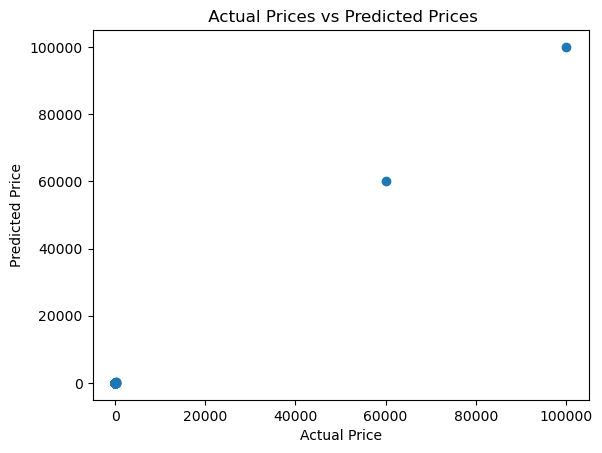

In [98]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [99]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [100]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  1.0


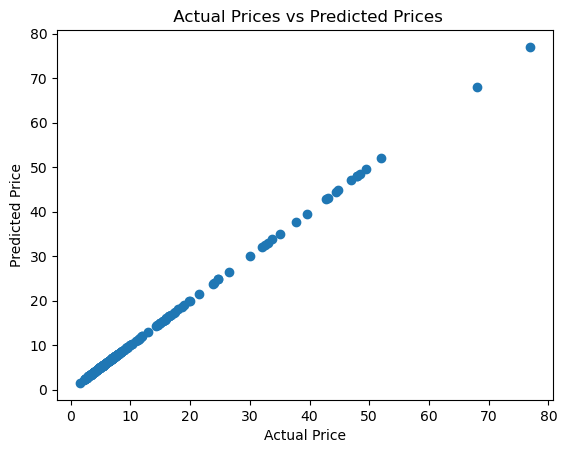

In [101]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [102]:
# loading the linear regression model
lass_reg_model = Lasso()

In [103]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [104]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [105]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9999999999999806


Visualize the actual prices and Predicted prices

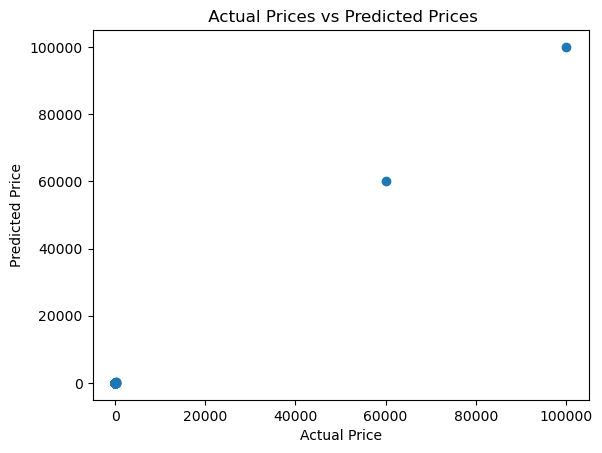

In [106]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [107]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [108]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.999999999999048


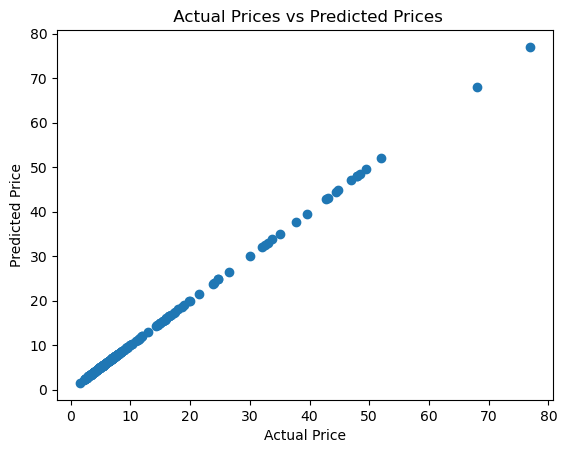

In [109]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()